In [43]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree as sktree

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [28]:
data = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Hitters.csv")
data

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [29]:
# Remove samples with missing Salary values
data = data.dropna(subset=["Salary"])
data["salary_log"] = np.log(data["Salary"])
data

/tmp/ipykernel_1722/623646771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["salary_log"] = np.log(data["Salary"])


,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,salary_log
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,414,375,N,W,632,43,10,475.0,N,6.163315
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,266,263,A,W,880,82,14,480.0,A,6.173786
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,838,354,N,E,200,11,3,500.0,N,6.214608
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,46,33,N,E,805,40,4,91.5,N,4.516339
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,336,194,A,W,282,421,25,750.0,A,6.620073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,311,138,N,E,325,9,3,700.0,N,6.551080
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,451,875,A,E,313,381,20,875.0,A,6.774224
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,93,146,A,W,37,113,7,385.0,A,5.953243
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,420,332,A,E,1314,131,12,960.0,A,6.866933


In [30]:
# including only needed variables into regression tree

df = data.dropna(subset=["Years", "Hits", "salary_log"])
X = df[["Years", "Hits"]]
y = df["salary_log"]


tree1 = DecisionTreeRegressor(random_state=1)
tree1.fit(X, y)

tree1.score(X, y)

0.9964804755929203

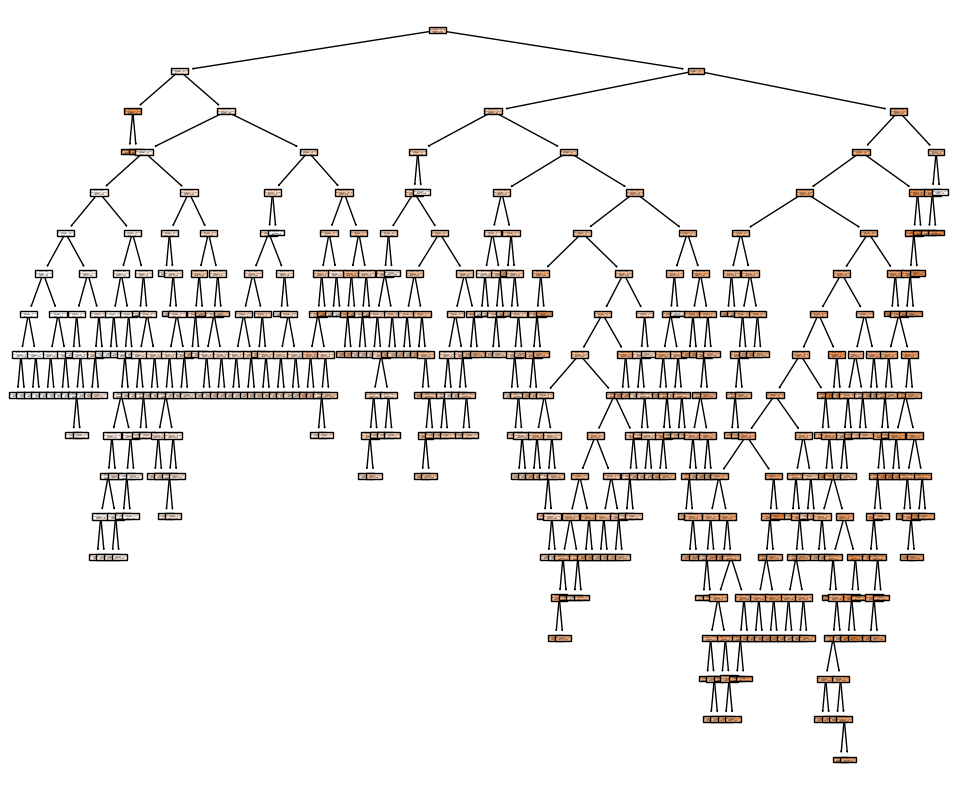

In [31]:
# plot with all possible splittings
plt.figure(figsize=(12,10))
sktree.plot_tree(tree1, feature_names=["Years", "Hits"], filled=True)
plt.show()

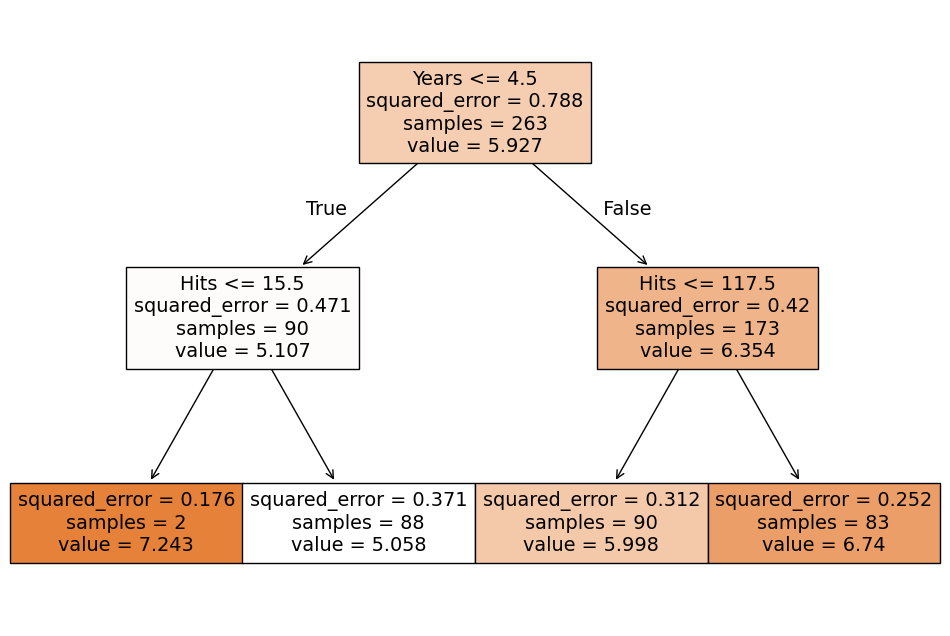

In [32]:
# now applying some criteria to the tree
tree2 = DecisionTreeRegressor(max_depth=2, random_state=1)
tree2.fit(X, y)
plt.figure(figsize=(12,8))
sktree.plot_tree(tree2, feature_names=["Years", "Hits"], filled=True)
plt.show()

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


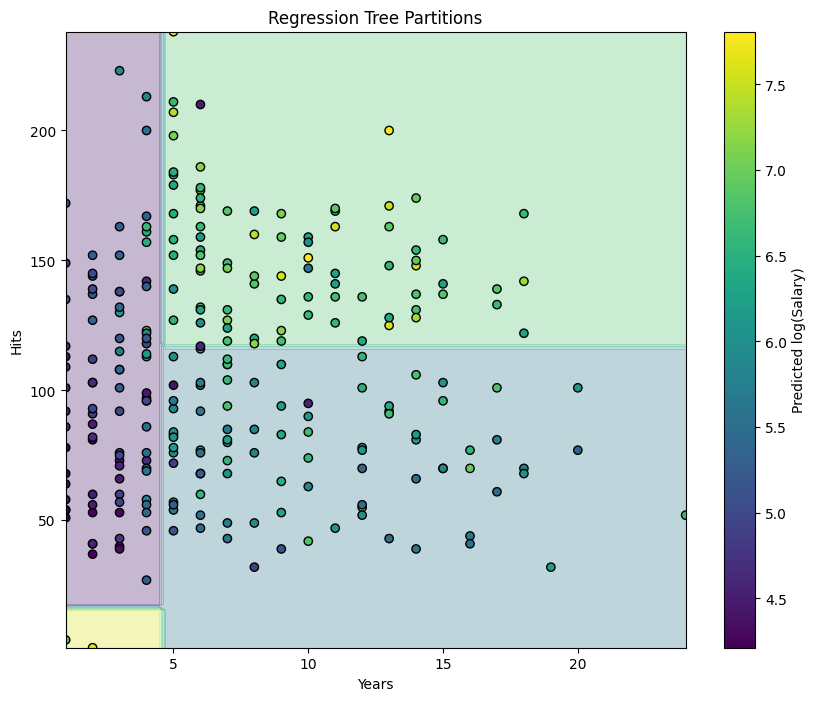

In [33]:
# plot 
# Create a grid of values
years_range = np.linspace(X["Years"].min(), X["Years"].max(), 100)
hits_range = np.linspace(X["Hits"].min(), X["Hits"].max(), 100)
xx, yy = np.meshgrid(years_range, hits_range)
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict for each point in the grid
zz = tree2.predict(grid).reshape(xx.shape)

# Plot the regions
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, zz, alpha=0.3, cmap="viridis")
plt.scatter(X["Years"], X["Hits"], c=y, cmap="viridis", edgecolor="k")
plt.xlabel("Years")
plt.ylabel("Hits")
plt.title("Regression Tree Partitions")
plt.colorbar(label="Predicted log(Salary)")
plt.show()

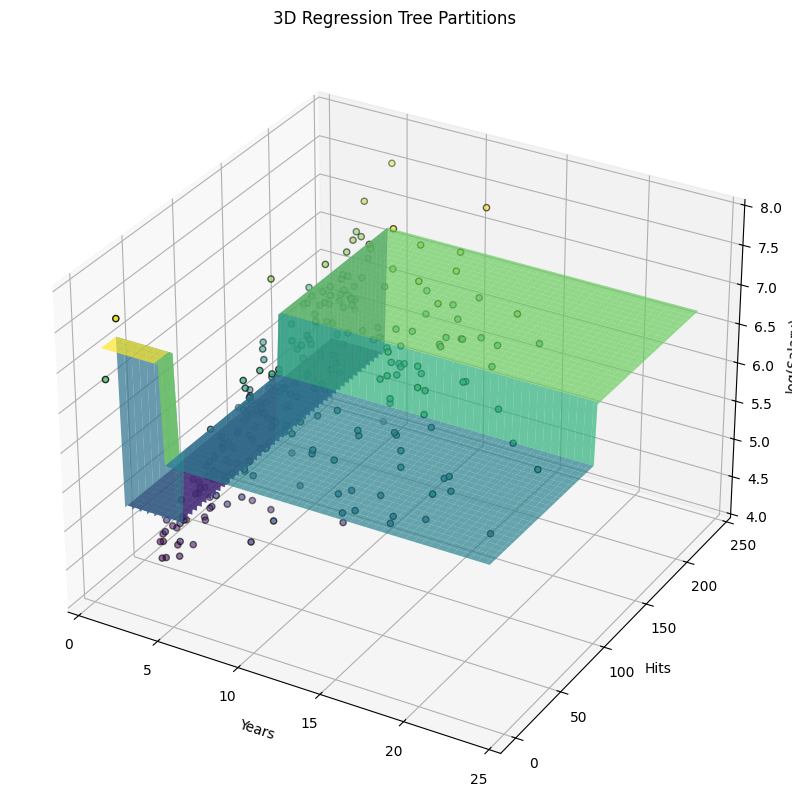

In [34]:
# a 3d View as well
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.7)
ax.scatter(X["Years"], X["Hits"], y, c=y, cmap='viridis', edgecolor='k')
ax.set_xlabel('Years')
ax.set_ylabel('Hits')
ax.set_zlabel('log(Salary)')
ax.set_title('3D Regression Tree Partitions')
plt.show()

Now, I want to split my data into 2 sets and train the model

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [42]:
# Build regression trees with different Alphas values for pruning

alphas = np.linspace(0, 0.05, 10)

trees = []
num_leaves = []

for alpha in alphas:
    tree = DecisionTreeRegressor(random_state=1, ccp_alpha=alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)
    num_leaves.append(tree.get_n_leaves())
    print(f"alpha={alpha:.3f}, terminal nodes={tree.get_n_leaves()}")

alpha=0.000, terminal nodes=127
alpha=0.006, terminal nodes=17
alpha=0.011, terminal nodes=9
alpha=0.017, terminal nodes=8
alpha=0.022, terminal nodes=6
alpha=0.028, terminal nodes=5
alpha=0.033, terminal nodes=5
alpha=0.039, terminal nodes=4
alpha=0.044, terminal nodes=4
alpha=0.050, terminal nodes=3


In [45]:
# I am doing a cross-validation with 6 folds to estimate the generalization error of the models
cv_mse = []
for tree, alpha in zip(trees, alphas):
    # Negative MSE, so multiply by -1 to get positive MSE
    scores = cross_val_score(DecisionTreeRegressor(random_state=1, ccp_alpha=alpha), X_train, y_train, cv=6, scoring='neg_mean_squared_error')
    mse = -scores.mean()
    cv_mse.append(mse)
    print(f"alpha={alpha:.3f}, CV MSE={mse:.3f}")

alpha=0.000, CV MSE=0.508
alpha=0.006, CV MSE=0.432
alpha=0.011, CV MSE=0.430
alpha=0.017, CV MSE=0.376
alpha=0.022, CV MSE=0.364
alpha=0.028, CV MSE=0.371
alpha=0.033, CV MSE=0.378
alpha=0.039, CV MSE=0.381
alpha=0.044, CV MSE=0.398
alpha=0.050, CV MSE=0.407


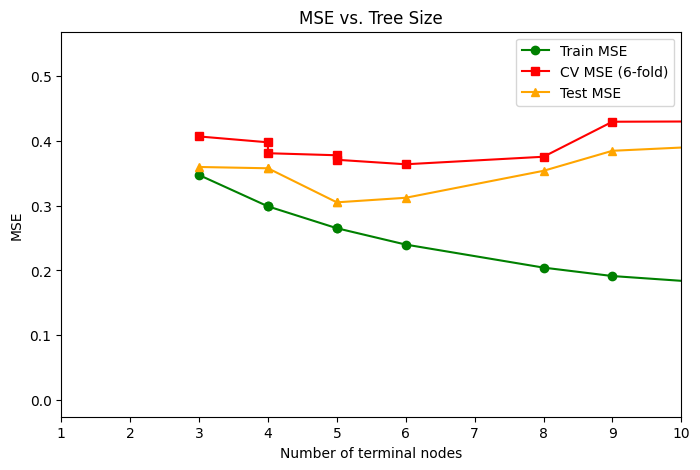

In [50]:
# Plot MSEs versus tree size (number of terminal nodes)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(num_leaves, train_mse, marker='o', color='green', label='Train MSE')
ax.plot(num_leaves, cv_mse, marker='s', color='red', label='CV MSE (6-fold)')
ax.plot(num_leaves, test_mse, marker='^', color='orange', label='Test MSE')
ax.set_xlabel('Number of terminal nodes')
ax.set_ylabel('MSE')
ax.set_title('MSE vs. Tree Size')
ax.set_xlim(1, 10)
ax.legend()
plt.show()